In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas_profiling
from collections import defaultdict
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,recall_score,roc_curve,roc_auc_score,precision_score,classification_report,confusion_matrix
from xgboost import XGBClassifier
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings('ignore')
from mlxtend.plotting import plot_learning_curves
from sklearn.svm import SVC
from sklearn.metrics import make_scorer

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link= 'https://drive.google.com/file/d/1o6L-jF90wtqYt_TRhEA-5yGW6OKXOi-s/view?usp=sharing'

In [ ]:
id = '1o6L-jF90wtqYt_TRhEA-5yGW6OKXOi-s'
print (id) # Verify that you have everything after '='

1o6L-jF90wtqYt_TRhEA-5yGW6OKXOi-s


In [ ]:

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('login.csv')  
df1 = pd.read_csv('login.csv')
# Dataset is now stored in a Pandas Dataframe
df1.index.name = 'id'

In [ ]:
df1


,PARTY_ID,LAST_LOGIN
id,,
0,233823836,31-01-2017 11:28
1,233823838,12-06-2017 11:22
2,233823838,14-06-2017 13:41
3,233823838,15-06-2017 08:31
4,233823838,22-06-2017 09:56
...,...,...
586176,685219705,21-10-2020 17:58
586177,685231467,22-10-2020 08:55
586178,685231471,22-10-2020 08:52


In [ ]:
df1.shape


(586181, 2)

In [ ]:
df1.describe

<bound method NDFrame.describe of          PARTY_ID        LAST_LOGIN
id                                 
0       233823836  31-01-2017 11:28
1       233823838  12-06-2017 11:22
2       233823838  14-06-2017 13:41
3       233823838  15-06-2017 08:31
4       233823838  22-06-2017 09:56
...           ...               ...
586176  685219705  21-10-2020 17:58
586177  685231467  22-10-2020 08:55
586178  685231471  22-10-2020 08:52
586179  685231473  22-10-2020 09:02
586180  685231476  22-10-2020 17:56

[586181 rows x 2 columns]>

In [ ]:
df1.columns.values

array(['PARTY_ID', 'LAST_LOGIN'], dtype=object)

In [ ]:
#Check for na or missing data
df1.isna().sum()

PARTY_ID      0
LAST_LOGIN    0
dtype: int64

In [ ]:
#Show statistics on the current data 
df1.describe()

,PARTY_ID
count,5.861810e+05
mean,3.679227e+08
std,1.027437e+08
min,2.338238e+08
25%,2.574514e+08
50%,3.563548e+08
75%,4.283442e+08
max,6.852315e+08


In [ ]:
df1.dtypes

PARTY_ID       int64
LAST_LOGIN    object
dtype: object

In [ ]:
#counting the frequencies of a party_id
#arr= df1.PARTY_ID.unique()
df1.PARTY_ID.value_counts()

233824637    1193
233823853     896
233824108     847
233832694     841
233824342     836
             ... 
398958599       1
411652059       1
488337311       1
233824009       1
464549903       1
Name: PARTY_ID, Length: 25744, dtype: int64

In [ ]:
#counting the number of logins of each member
df1['Counts'] = df1.groupby(['PARTY_ID'])['LAST_LOGIN'].transform('count')

In [ ]:
df1.head(50)

,PARTY_ID,LAST_LOGIN,Counts
id,,,
0,233823836,31-01-2017 11:28,1
1,233823838,12-06-2017 11:22,17
2,233823838,14-06-2017 13:41,17
3,233823838,15-06-2017 08:31,17
4,233823838,22-06-2017 09:56,17
5,233823838,26-06-2017 11:43,17
6,233823838,27-06-2017 08:35,17
7,233823838,29-06-2017 19:41,17
8,233823838,03-07-2017 09:20,17


In [ ]:
df1.describe()

,PARTY_ID,Counts
count,5.861810e+05,586181.000000
mean,3.679227e+08,209.756906
std,1.027437e+08,199.504394
min,2.338238e+08,1.000000
25%,2.574514e+08,45.000000
50%,3.563548e+08,150.000000
75%,4.283442e+08,325.000000
max,6.852315e+08,1193.000000


In [ ]:
# 0 for who can churn & 1 for who can stay
def find_cus(df1):
    if df1['Counts'] > 23:
        return 1
    else:
        return 0
df1['churn'] = df1.apply(find_cus,axis=1)
df1.head()


,PARTY_ID,LAST_LOGIN,Counts,churn
id,,,,
0,233823836,31-01-2017 11:28,1,0
1,233823838,12-06-2017 11:22,17,0
2,233823838,14-06-2017 13:41,17,0
3,233823838,15-06-2017 08:31,17,0
4,233823838,22-06-2017 09:56,17,0


In [ ]:
#dfn = df1

In [ ]:
dfn=df1.drop_duplicates(subset=['PARTY_ID'])

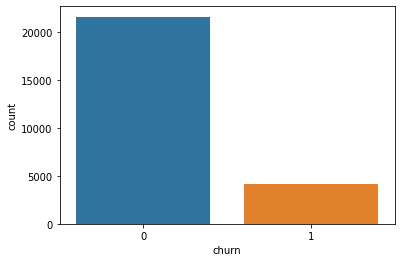

In [ ]:
sns.countplot(dfn['churn'])

In [ ]:
dfn['churn'].describe()

count    25744.000000
mean         0.160814
std          0.367367
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: churn, dtype: float64

In [ ]:
#counting the number of 1&0 in churn column
dfn.churn.value_counts()

0    21604
1     4140
Name: churn, dtype: int64

In [ ]:
X=df1.copy().drop(columns=['churn','LAST_LOGIN'],axis=1)
Y=df1['churn']    
X_train,X_validation,y_train,y_validation=train_test_split(X,Y,test_size=0.3,random_state=101)

In [ ]:
print(X_train.shape)
print(X_validation.shape)

(410326, 2)
(175855, 2)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     30319
           1       0.83      1.00      0.91    145536

    accuracy                           0.83    175855
   macro avg       0.41      0.50      0.45    175855
weighted avg       0.68      0.83      0.75    175855



([0.17323064924936635,
  0.17360628769877537,
  0.1744559168785592,
  0.173575824041918,
  0.1738373878330888,
  0.1735412985641463,
  0.17361817093041068,
  0.17382257966246267,
  0.1741625213583794,
  0.1740372289350419],
 [0.17240908703192973,
  0.17240908703192973,
  0.17240908703192973,
  0.17240908703192973,
  0.17240908703192973,
  0.17240908703192973,
  0.17240908703192973,
  0.17240908703192973,
  0.17240908703192973,
  0.17240908703192973])

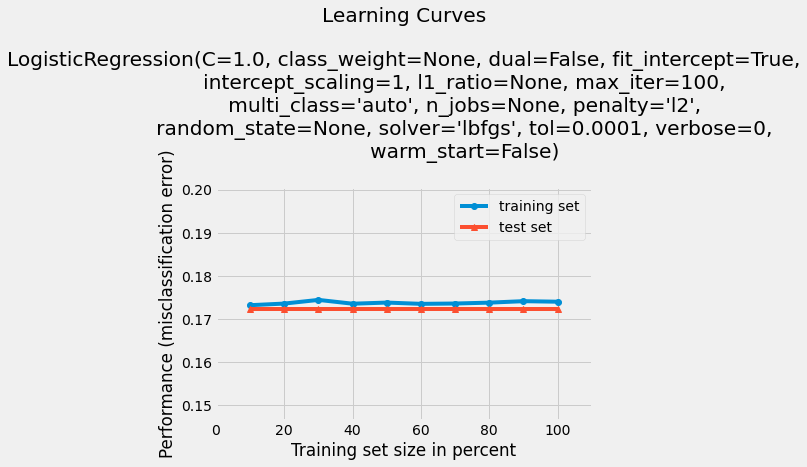

In [ ]:
lnr = LogisticRegression()
lnr.fit(X_train,y_train)
pred_train = lnr.predict(X_train)
pred_val = lnr.predict(X_validation)
#pred_test=lnr.predict(test_data)
#print(pred_test)
#train_f1=f1_score(y_train,pred_train)
#val_f1=f1_score(y_validation,pred_val)
#val_recall=recall_score(y_validation,pred_val)
#train_recall=recall_score(y_train,pred_train)
#acc=accuracy_score(y_validation,pred_val)
print(classification_report(y_validation,pred_val))
#print("Accuracy :",acc)
#df=pd.DataFrame({'ActualTrain': y_validation, 'PredictedTrain':pred_val})
#df.head(20)
plot_learning_curves(X_train, y_train, X_validation, y_validation, lnr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30319
           1       1.00      1.00      1.00    145536

    accuracy                           1.00    175855
   macro avg       1.00      1.00      1.00    175855
weighted avg       1.00      1.00      1.00    175855

1.0


([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

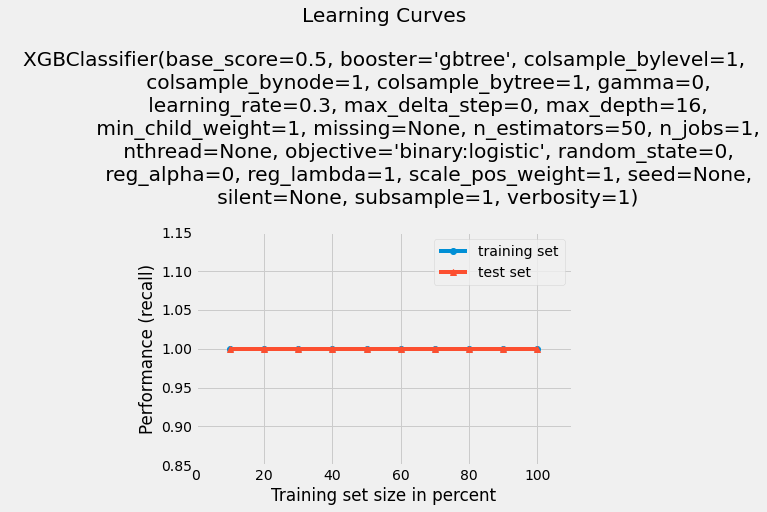

In [ ]:
xgb_model=XGBClassifier(learning_rate=0.3,max_depth=16,n_estimators=50)
xgb_model.fit(X_train,y_train)
pred_train = xgb_model.predict(X_train)
pred_val = xgb_model.predict(X_validation)
acc=accuracy_score(y_validation,pred_val)
print(classification_report(y_validation,pred_val))
print(acc)
plot_learning_curves(X_train, y_train, X_validation, y_validation, xgb_model,scoring='recall')


In [ ]:
xbg_model=XGBClassifier()
param_grid = {"max_depth" : [12,14,16,18,20],
              "learning_rate":[0.001,0.01,0.1,0.2,0.3],
              'colsample_bytree': np.linspace(0.5, 0.9, 5),
              'n_estimators':[100, 200],
             }

xgb_cv_grid = GridSearchCV(estimator = xbg_model, param_grid = param_grid,cv=3,scoring = make_scorer(lambda yt,yp: recall_score(yt,yp,pos_label = 1)))
xgb_cv_grid.fit(X_train,y_train)

In [ ]:
print(xgb_cv_grid.best_params_)

In [ ]:
xgb_model=XGBClassifier(learning_rate=0.05,max_depth=3,n_estimators=200,colsample_bytree=0.5)
xgb_model.fit(X_train,y_train)
pred_train = xgb_model.predict(X_train)
pred_val = xgb_model.predict(X_validation)
acc=accuracy_score(y_validation,pred_val)
print(classification_report(y_validation,pred_val))
print(acc)
plot_learning_curves(X_train, y_train, X_validation, y_validation, xgb_model,scoring='f1')